# Programa de capacitação

**Sistemas ópticos coerentes**

Adolfo Fernandes Herbster

Essentials of Signal Processing

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2018

# Digital Modulators and Demodulators - Passband Simulation Models

## Binary Phase Shift Keying (BPSK)

Binary Phase Shift Keying (BPSK) is a two phase modulation scheme, where the 0’s and 1’s in a binary message
are represented by two different phase states in the carrier signal: $\theta$ = 0° for binary 1 and $\theta$ = 180° for binary 0. Therefore, within a bit duration $T_b$, the two different phase states of the carrier signal are represented as
\begin{equation}
s(t) = 
\begin{cases}
 A_c \cos(2\pi f_c t),       \, &0 \leq x \leq T_b \text{ for binary 1}  \\
 A_c \cos(2\pi f_c t + \pi), \, &0 \leq x \leq T_b \text{ for binary 0}.
\end{cases}
\end{equation}
where, $A_c$ is the amplitude of the sinusoidal signal, $f_c$ is the carrier frequency (Hz), $t$ being the instantaneous
time in seconds, $T_b$ is the bit period in seconds. The signal $s(t)$ stands for the carrier signal when information
bit ak = 0 was transmitted and when information bit ak = 1 was transmitted.

### Transmitter
The BPSK transmitter is implemented by conding the message bits using NRZ coding (1 represented  by  positive  voltage  and  0  represented  by  negative  voltage) and multiplying the output by a reference oscillator running at carrier frequency $f_c$.

<img src="bpsk_transmitter.png" style="width: 600px;"/>

In [6]:
%matplotlib inline
import numpy as num
import matplotlib.pyplot as plt

N=2**16;   # Number of symbols to transmit
L=64;      # oversampling factor,L=Tb/Ts(Tb=bit period,Ts=sampling period)
           # if a carrier is used, use L = Fs/Fc, where Fs >> 2xFc
Fc=800;    # carrier frequency
Fs=L*Fc;   # sampling frequency

# Bit stream generation
ak = num.random.randint(2, size = N);

## # BPSK transmitter
a  = 2*ak-1;              
ai = num.tile(a, (L, 1)); # bit stream at Tb baud with rect pulse shape
ai = ai.flatten('F');
t  = num.arange(0, N*L);  # time base
s_tx = ai*num.cos(2*num.pi*Fc*t/Fs); #transmitted signal with carrier

Now we can see the bit stream oversampled (using only 10 bits length).

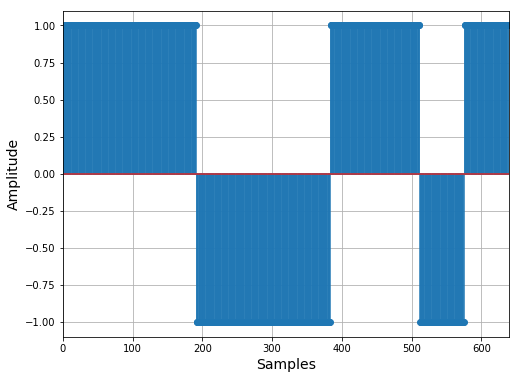

In [7]:
plt.figure(figsize=(8,6));
plt.stem(t[0:10*L], ai[0:10*L]);
plt.xlim(0, 10*L);
plt.xlabel("Samples", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.grid(True);
plt.show();

As we can see in the next figure, the modulated signal changes the phase during bits transitions.

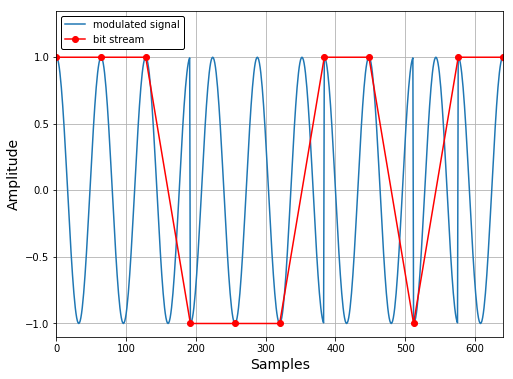

In [8]:
plt.figure(figsize=(8,6));
plt.plot(t, s_tx, label='modulated signal');
plt.plot(t[::L], ai[::L], 'ro-', label='bit stream');
plt.xlim(0, 10*L);
plt.ylim(-1.1,1.35);
plt.xlabel("Samples", fontsize = 14);
plt.ylabel("Amplitude", fontsize = 14);
plt.grid(True);
plt.legend(loc='upper left', framealpha = 1, edgecolor = 'k');
plt.show();

In digital comunications, a very important graph is the *constellation diagram*. Using this diagram, we can estimate the number of symbols used.

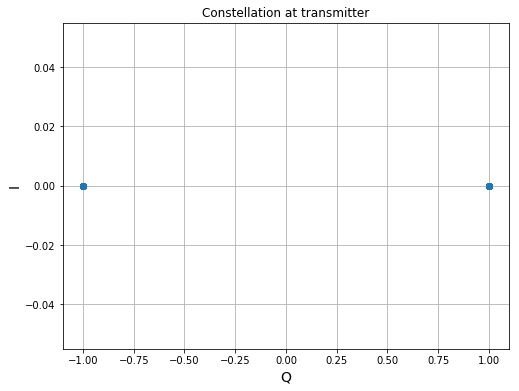

In [9]:
plt.figure(figsize=(8,6));
plt.title('Constellation at transmitter');
plt.plot(num.real(ai[::16]), num.imag(ai[::16]), 'o');
plt.xlabel("Q", fontsize = 14);
plt.ylabel("I", fontsize = 14);
plt.grid(True);

Now, we can plot the power spectrum density of the transmitted signal. We use the function _welch_ to obtain the frequency and power of the signal spectrum.

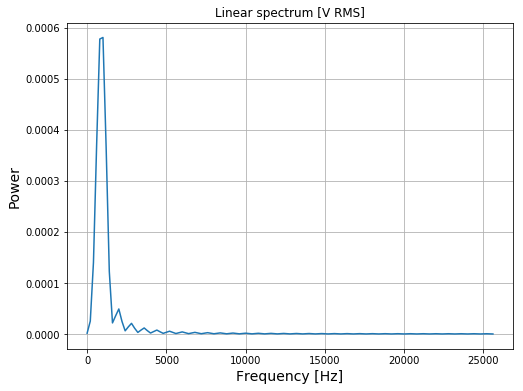

In [10]:
from scipy import signal;
from mpldatacursor import datacursor
f, Pxx_den = signal.welch(s_tx, Fs);
plt.figure(figsize=(8,6));
plt.plot(f, Pxx_den);
plt.title("Linear spectrum [V RMS]");
plt.xlabel("Frequency [Hz]", fontsize = 14);
plt.ylabel("Power"         , fontsize = 14);
plt.grid(True);
plt.show();

### Receiver
A correlation type coherent detector, shown in next figure, is used for receiver implementation. In coherent detection technique, the knowledge of the carrier frequency and phase must be known to the receiver. This can be achieved by using a *Costas loop* or a *Phase Lock Loop* (PLL) at the receiver. For simulation purposes, we simply assume that the carrier phase  recovery was done and therefore we directly use the generated reference frequency at the receiver $-cos(2πf_ct)$.
<img src="bpsk_receiver.png" style="width: 600px;"/>

BER = 0.0


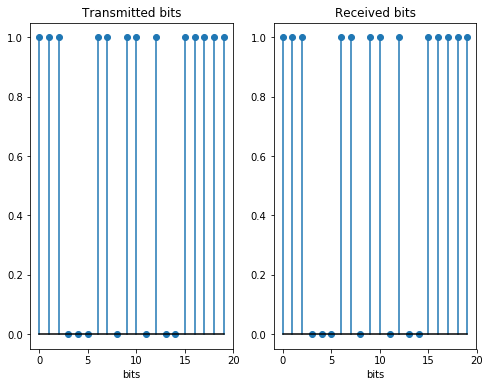

In [12]:
sr = s_tx * num.cos(2*num.pi*Fc*t/Fs); # multiply 
sr = num.convolve(num.real(sr), num.ones(L)); # integrate
sr = sr[L::L];   # resample
ak_r = num.clip(sr, 0, 1); # threshold

plt.figure(figsize=(8,6));
ax1 = plt.subplot(1, 2, 1);
ax1.stem(ak[0:20], basefmt="k");
ax1.set(xlabel = 'bits', title = 'Transmitted bits');
ax2 = plt.subplot(1, 2, 2);
ax2.stem(ak_r[0:20], basefmt="k");
ax2.set(xlabel = 'bits', title = 'Received bits');
BER = num.sum(num.abs(ak_r - ak))/N;
print('BER = ' + repr(BER/N));

### BPSK Bit Error Rate (BER) with AWGN channel
The complete waveform simulation for the end-to-end transmission of information using BPSK modulation involves:
1. generating  random  message  bits,
1. modulating  them  using  BPSK  modulation,
1. addition  of AWGN noise according to the chosen signal-to-noise ratio and
1. demodulating the noisy signal using a coherent receiver.
The theorical BER is calculated assuming that the BPSK symbols are transmitted through an AWGN channel characterized by variance = $N_0/2$ Watts.
<img src="theorical_error_BPSK.png"   style="width: 600px;"/>

The continuous density functions are
\begin{matrix}
    f(r\mid 0_T)=\frac{1}{\sqrt{\pi N_0}}exp\left \{ -\frac{\left( \hat{r}-\hat{s}_0\right )^2}{N_0} \right \} \;\;\;\;\;\rightarrow (1A) \\
\\ f(r\mid 1_T)=\frac{1}{\sqrt{\pi N_0}}exp\left \{ -\frac{\left( \hat{r}-\hat{s}_1\right )^2}{N_0} \right \}\;\;\;\;\;\rightarrow (1B)
\end{matrix}

<img src="theorical_error_BPSK_P.png" style="width: 600px;"/>
\begin{align}
P( 1_D \mid 0_T ) &= Q\left (\sqrt{\frac{E_s}{N_0/2}}\right) \\
P( 0_D \mid 1_T ) &= Q\left(\sqrt{\frac{E_s}{N_0/2}}\right) 
\end{align}

For BPSK, since $E_s$=$E_b$, the probability of symbol error ($P_s$) and the probability of bit error ($P_b$) are same. Therefore, expressing the $P_s$ and $P_b$ in terms of $Q$ function and also in terms of complementary error function:
\begin{align}
    P_s = P_b = &Q\left(\sqrt{\frac{2E_s}{N_0}}\right) = Q\left(\sqrt{\frac{2E_b}{N_0}}\right) \\
    P_s = P_b = &0.5 \; erfc\left(\sqrt{\frac{E_s}{N_0}}\right).
\end{align}

In [42]:
EbN0dB  = num.arange(-4,12,2);         # Eb/N0 range in dB for simulation.
EbN0lin = 10**(EbN0dB/10);             # converting dB values to linear scale
BER     = num.zeros(num.size(EbN0dB)); # for SER values for each Eb/N0

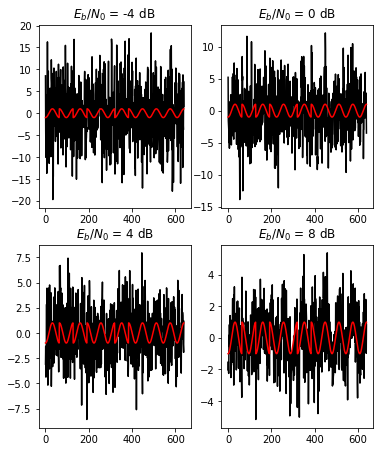

In [46]:
import scipy.special as sp
from scipy.stats import gaussian_kde

Eb = L * num.sum(num.abs(s_tx)**2)/num.size(s_tx); # signal energy
for i in range(len(EbN0dB)):
    N0 = Eb/EbN0lin[i];
    noise = num.sqrt(N0/2) * num.random.randn(num.size(s_tx));
    s_rx = s_tx + noise;
    if not num.mod(i, 2):
        plt.subplot(2,2,i/2+1);
        plt.plot(t[0:10*L], s_rx[0:10*L], 'k', t[0:10*L], s_tx[0:10*L], 'r');
        plt.subplots_adjust(bottom=0.1, top=1.5)
        plt.title('$E_b/N_0$ = ' + repr(EbN0dB[i]) + ' dB')
    s_rx = s_rx * num.cos(2*num.pi*Fc*t/Fs); # multiply 
    s_rx = num.convolve(num.real(s_rx), num.ones(L)); # integrate
    s_rx = s_rx[L::L];   # resample
    ak_r = num.clip(s_rx, 0, 1); # threshold
    BER[i] = num.sum(num.abs(ak_r - ak))/N;    
    

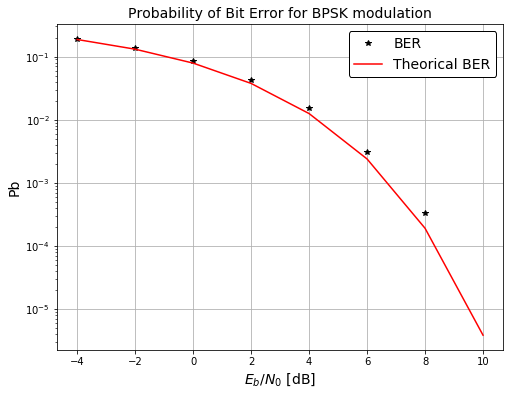

array([0.19181424, 0.13822647, 0.08642126, 0.04202836, 0.01556635,
       0.00302765, 0.00033596, 0.        ])

In [47]:
theoricalBER = 0.5 * sp.erfc(num.sqrt(EbN0lin));
plt.figure(figsize=(8,6));
plt.semilogy(EbN0dB, BER, 'k*', EbN0dB, theoricalBER, 'r-');
plt.title("Probability of Bit Error for BPSK modulation", fontsize = 14);
plt.xlabel("$E_b/N_0$ [dB]", fontsize = 14);
plt.ylabel("Pb"            , fontsize = 14);
plt.legend(['BER', 'Theorical BER'], framealpha = 1, edgecolor = 'k', fontsize = 14);
plt.grid(True);
plt.show();
BER